# Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Downloading Dataset

In [2]:
!gdown https://drive.google.com/uc?id=1cZX-V5PS_02M1dzgJsl0p7X_j68uuTHd

Downloading...
From: https://drive.google.com/uc?id=1cZX-V5PS_02M1dzgJsl0p7X_j68uuTHd
To: /content/RLS_demo_dataset.zip
100% 4.50k/4.50k [00:00<00:00, 10.6MB/s]


In [3]:
!unzip -o *.zip

Archive:  RLS_demo_dataset.zip
  inflating: linear/features.npy     
  inflating: linear/labels.npy       
  inflating: nonlinear/features.npy  
  inflating: nonlinear/labels.npy    


# Checking the Dataset

In [4]:
features = np.load('linear/features.npy')
labels = np.load('linear/labels.npy')

(102, 2)


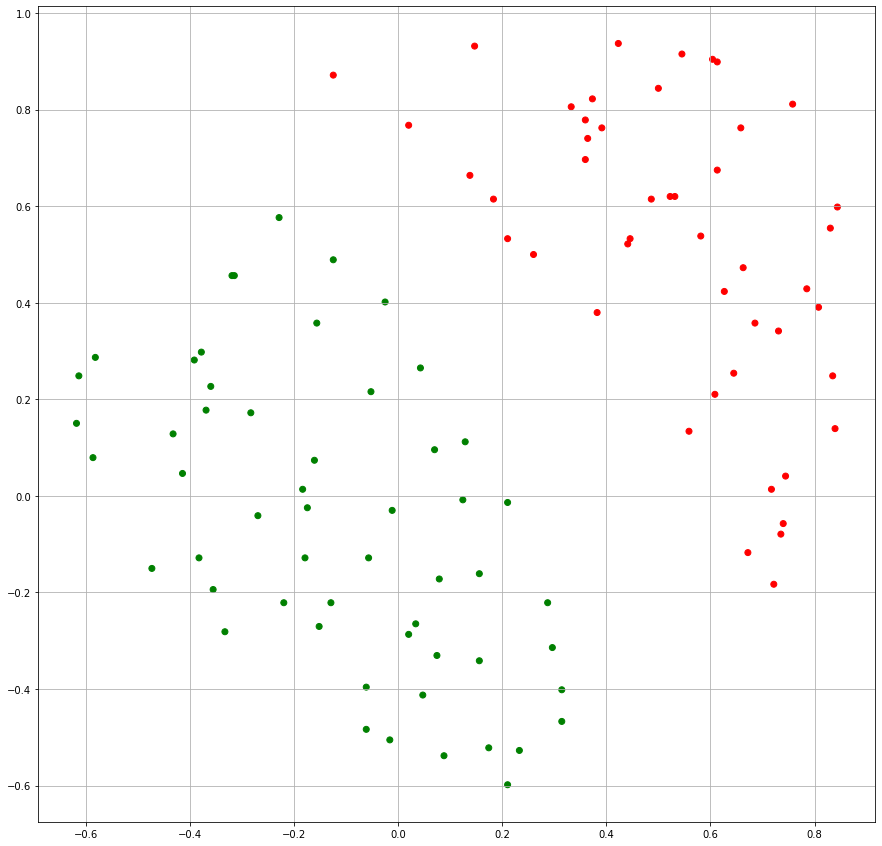

In [5]:
print(features.shape)
colors = ['red' if y==1 else 'green' for y in labels]

plt.figure(figsize=(15,15))
plt.scatter(features[:,0],features[:,1], c=colors)
plt.grid()

# Mini-batch gradient descen

## data preparation

In [6]:
x_aug = np.ones(shape=(features.shape[0],1))
X = np.concatenate([features, x_aug], axis=-1)

Y = labels

w_init = np.random.normal(size=(X.shape[1],1))


## Training

In [7]:
print(X.shape)
print(w_init.shape)
print(w_init)

(102, 3)
(3, 1)
[[ 0.8178706 ]
 [-2.47729042]
 [-0.55482169]]


In [8]:
batch_size=16
epochs = 50
eta = 0.1 #learning rate

'''
model :: p = w'x --> matrix model P=Xw
dL/dw = (wx-y)x --> matrix model X'(Xw-Y)
'''

w = w_init

n = X.shape[0]
losses = []
for e in range(epochs):
    dE = 0
    for i in range(0, n, batch_size):
        end = min(n, i+batch_size)

        x_batch = X[i:end]
        y_batch = Y[i:end]

        dE += np.matmul(x_batch.T,np.matmul(x_batch,w)-y_batch)

    w = w - eta*dE/np.linalg.norm(dE)
    
    pred = np.matmul(X,w)
    loss = np.mean(np.square(np.matmul(X,w)-Y))

    losses.append(loss)

    print('%i/%i iter #%i loss:%f'%(e,epochs,i, loss))
    
w_sgd = w

0/50 iter #96 loss:3.305730
1/50 iter #96 loss:3.074615
2/50 iter #96 loss:2.859687
3/50 iter #96 loss:2.660267
4/50 iter #96 loss:2.475584
5/50 iter #96 loss:2.304767
6/50 iter #96 loss:2.146850
7/50 iter #96 loss:2.000781
8/50 iter #96 loss:1.865445
9/50 iter #96 loss:1.739701
10/50 iter #96 loss:1.622434
11/50 iter #96 loss:1.512602
12/50 iter #96 loss:1.409285
13/50 iter #96 loss:1.311716
14/50 iter #96 loss:1.219288
15/50 iter #96 loss:1.131544
16/50 iter #96 loss:1.048157
17/50 iter #96 loss:0.968899
18/50 iter #96 loss:0.893619
19/50 iter #96 loss:0.822217
20/50 iter #96 loss:0.754627
21/50 iter #96 loss:0.690804
22/50 iter #96 loss:0.630717
23/50 iter #96 loss:0.574341
24/50 iter #96 loss:0.521655
25/50 iter #96 loss:0.472637
26/50 iter #96 loss:0.427265
27/50 iter #96 loss:0.385516
28/50 iter #96 loss:0.347361
29/50 iter #96 loss:0.312771
30/50 iter #96 loss:0.281710
31/50 iter #96 loss:0.254136
32/50 iter #96 loss:0.230000
33/50 iter #96 loss:0.209245
34/50 iter #96 loss:0.19

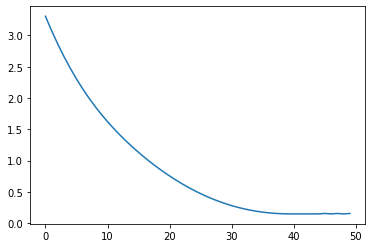

In [9]:
plt.plot(losses)

## Training using SGD with momentum

In [10]:
batch_size=16
epochs = 50
eta = 0.1 #learning rate
gamma = 0.7

'''
model :: p = w'x --> matrix model P=Xw
dL/dw = (wx-y)x --> matrix model X'(Xw-Y)
'''


w = w_init
v = np.zeros_like(w)

n = X.shape[0]
losses_sgdm = []
for e in range(epochs):
    dE = 0
    for i in range(0, n, batch_size):
        end = min(n, i+batch_size)

        x_batch = X[i:end]
        y_batch = Y[i:end]

        dE += np.matmul(x_batch.T,np.matmul(x_batch,w)-y_batch)

    v = gamma*v + eta*dE/np.linalg.norm(dE)
    w = w - v;

    pred = np.matmul(X,w)
    loss = np.mean(np.square(np.matmul(X,w)-Y))

    losses_sgdm.append(loss)

    # if i%10==0:
    print('%i/%i iter #%i loss:%f'%(e,epochs,i, loss))

w_sgdm = w
     

0/50 iter #96 loss:3.305730
1/50 iter #96 loss:2.923144
2/50 iter #96 loss:2.499883
3/50 iter #96 loss:2.101507
4/50 iter #96 loss:1.763293
5/50 iter #96 loss:1.489912
6/50 iter #96 loss:1.260377
7/50 iter #96 loss:1.047314
8/50 iter #96 loss:0.839048
9/50 iter #96 loss:0.643607
10/50 iter #96 loss:0.477618
11/50 iter #96 loss:0.351794
12/50 iter #96 loss:0.261945
13/50 iter #96 loss:0.199619
14/50 iter #96 loss:0.168036
15/50 iter #96 loss:0.158904
16/50 iter #96 loss:0.158474
17/50 iter #96 loss:0.156616
18/50 iter #96 loss:0.154924
19/50 iter #96 loss:0.154875
20/50 iter #96 loss:0.153014
21/50 iter #96 loss:0.150055
22/50 iter #96 loss:0.151862
23/50 iter #96 loss:0.154531
24/50 iter #96 loss:0.151789
25/50 iter #96 loss:0.149784
26/50 iter #96 loss:0.155407
27/50 iter #96 loss:0.151827
28/50 iter #96 loss:0.159738
29/50 iter #96 loss:0.155899
30/50 iter #96 loss:0.151728
31/50 iter #96 loss:0.150268
32/50 iter #96 loss:0.158319
33/50 iter #96 loss:0.154456
34/50 iter #96 loss:0.15

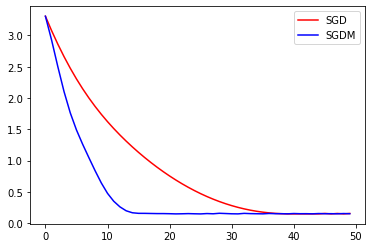

In [11]:
plt.plot(losses, 'red')
plt.plot(losses_sgdm,'blue')
plt.legend(["SGD", "SGDM"])